# Образование дефекта на "прожекторе"



Не потрудитесь ли объяснить, как в таком случае посадочному модулю удалось отгрызть кусочек от ореола (в фотоаппарате!)? "В очках" 
https://glav.su/forum/1/682/messages/5322609/#message5322609


Исходная фотография: [AS12-46-6739](https://normalized2.github.io/apollo/#/doc?image=6739)



In [1]:
from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from os.path import join, exists, basename
from pathlib import Path
from PIL import Image as pil_image
from IPython.display import display, HTML, Image
import re
import requests
import datetime

import cv2

In [2]:
#!wget https://glav.su/files/messages/2019/07/02/5322609_79b3ed2bb452f7b3890a576158504d20.jpg -O AS12-46-6739_erosion.jpg
#!wget https://farm1.staticflickr.com/753/21700152225_abcb6512f0_o.jpg  -O AS12-46-6739.jpg

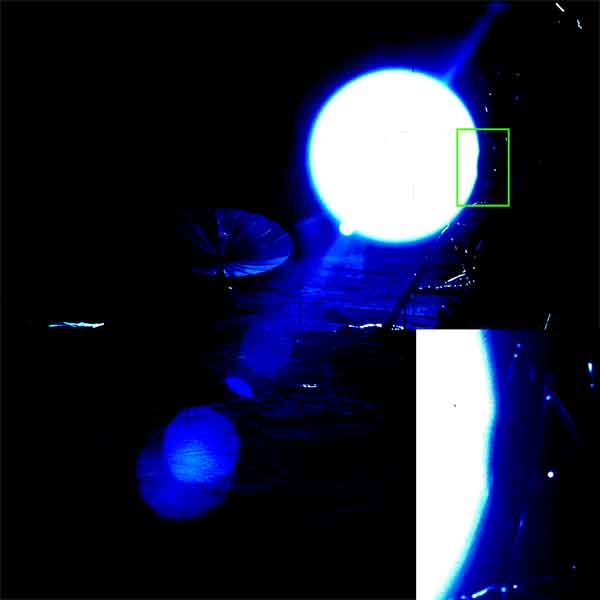

In [3]:
Image('AS12-46-6739_erosion.jpg')

# Utils

In [4]:
def show_source(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.set_title('Исходное изображение')
    pass

def apply_reseau_Plate(img, kernel):
    """
    """
    img_channels = cv2.split(img)
    kernel_channels = cv2.split(kernel)
    res = []
    for i in range(3):
        img_c = img_channels[i]
        kernel_c = kernel_channels[i]

        r = cv2.filter2D(img_c, -1, kernel_c)

        ret, r = cv2.threshold(r, 0.5, 1., cv2.THRESH_BINARY)

        #r[r>0.5] = 1
        #r[r<=0.5] = 0

        res.append(r)
    res = cv2.merge(res)
    
    res = (res + img) / 2
    
    return res

def apply_and_show(img, kernel, fn=None):
    res = apply_reseau_Plate(img, kernel)
    print(res.min(), res.max())
    
    fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

    ax = axes[0]
    ax.imshow(img)
    ax.set_title('Исходное изображение')

    ax = axes[1]
    ax.imshow(res)
    ax.set_title('Применение фильтра')
    
    if fn is not None:
        fig.savefig(fn)
    
    return res

def show_res(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.set_title('Применение эффекта')

    
def save_image(fn, img):
    img = (img * 255).astype(np.uint8)
    print(img.min(), img.max(), img.shape)
    #img = img.transpose(2, 1, 0)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(fn, img)


# Примеры

## 1

In [6]:
WIDTH = 1024
HEIGHT = 1024

center = WIDTH // 3, HEIGHT // 2
R = 30
color = (1, 1, 1)

img_a = np.zeros(shape=(HEIGHT, WIDTH, 3))

img_a = cv2.circle(img_a, center=center, radius=R, color=color, thickness=-1, lineType=8, shift=0)
img_a.max(), img_a.min()

(1.0, 0.0)

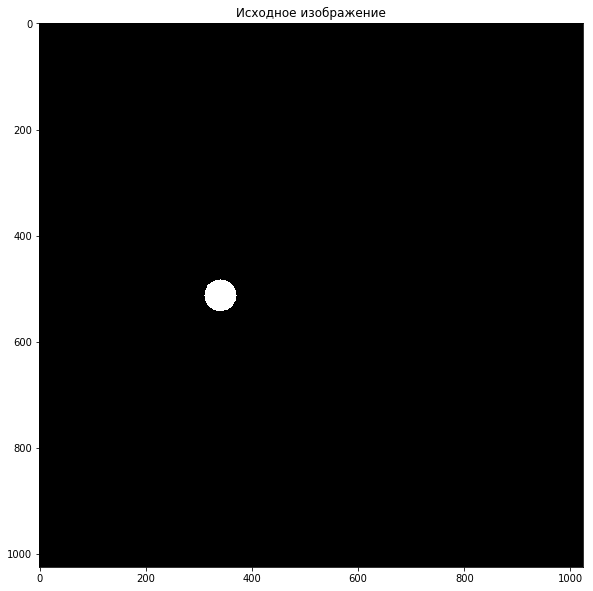

In [7]:
show_source(img_a)

### Ядро эффекта

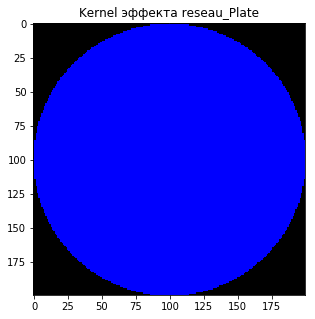

In [8]:
R_effect = 200

kernel = np.zeros(shape=(R_effect, R_effect, 3))

kernel = cv2.circle(kernel, center=(R_effect // 2, R_effect // 2), radius=R_effect // 2, color=(0, 0, 1), thickness=-1, lineType=8, shift=0)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(kernel)
ax.set_title('Kernel эффекта reseau_Plate')
pass

In [9]:
res = apply_reseau_Plate(img_a, kernel)
res.min(), res.max()

(0.0, 1.0)

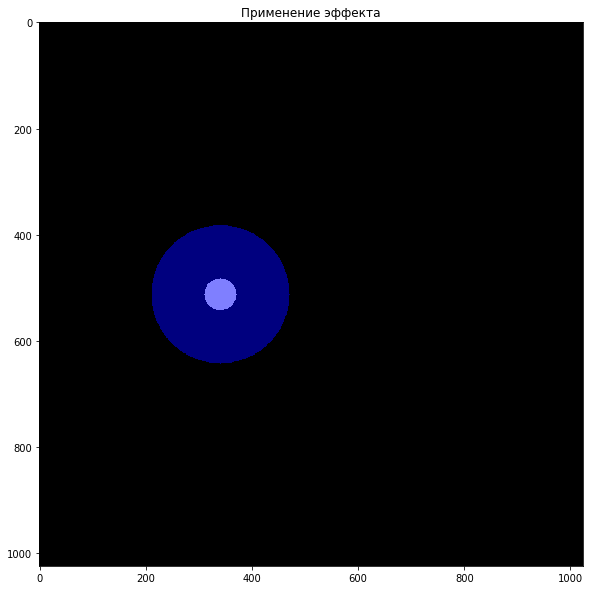

In [10]:

show_res(res)

In [11]:
save_image('erosion_res_1.png', res)

0 255 (1024, 1024, 3)


0.0 1.0


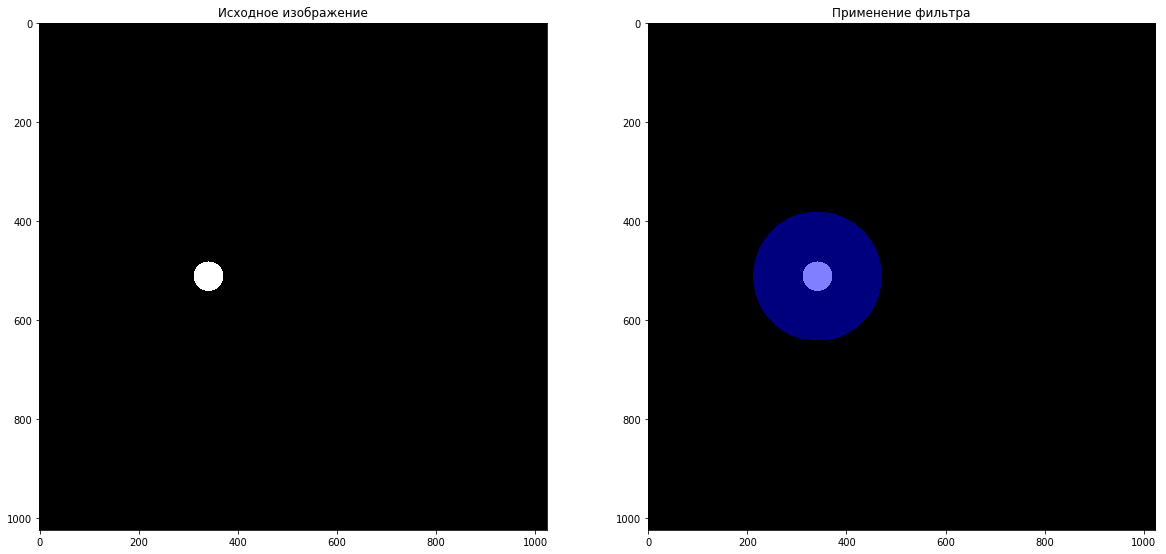

In [12]:
res = apply_and_show(img_a, kernel, 'erosion_example_1.png')

## 2

In [13]:
def get_example_2():
    img = np.zeros(shape=(HEIGHT, WIDTH, 3))

    img = cv2.circle(img, center=center, radius=R, color=color, thickness=-1, lineType=8, shift=0)

    mask_center = center[0] + 2 * R, center[1]
    mask_R = R*2 + 10

    img = cv2.circle(img, center=mask_center, radius=mask_R, color=(0, 0, 0), thickness=-1, lineType=8, shift=0)
    
    print(img.max(), img.min())
    return img

In [14]:
img = get_example_2()

1.0 0.0


In [15]:
# show_source(img)

0.0 1.0


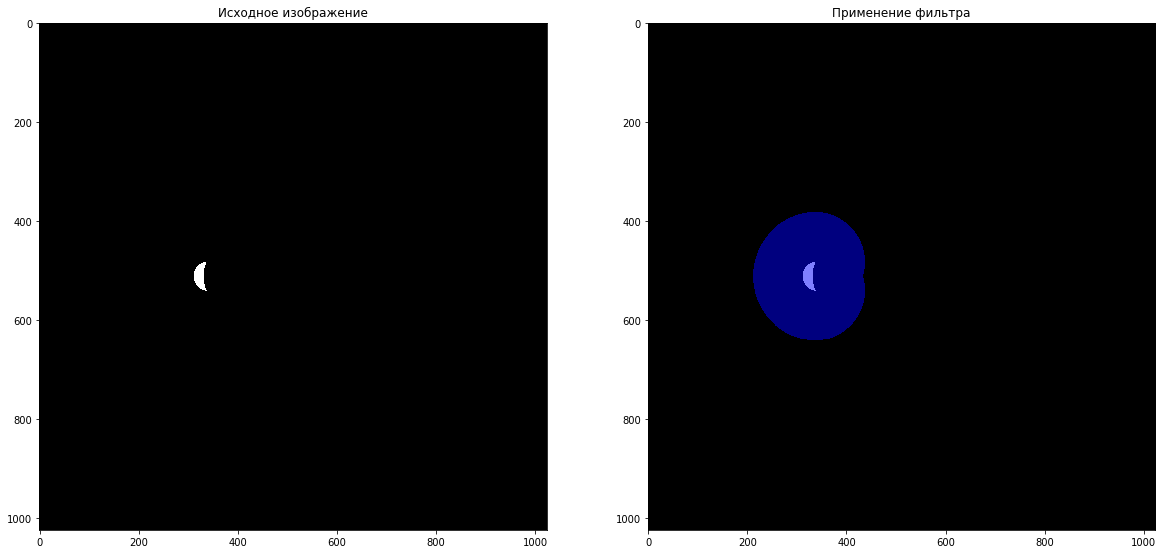

In [16]:
res = apply_and_show(img, kernel, 'erosion_example_2.png')

In [17]:
save_image('erosion_res_2.png', res)

0 255 (1024, 1024, 3)


## 3

In [18]:
def get_example_3():
    img = np.zeros(shape=(HEIGHT, WIDTH, 3))

    img = cv2.circle(img, center=center, radius=R, color=color, thickness=-1, lineType=8, shift=0)

    p1 = center[0] + R // 2, 0
    p2 = center[0] + R, 1024

    img = cv2.rectangle(img, p1, p2, color=(0, 0, 0), thickness=-1, lineType=8, shift=0)
    
    print(img.max(), img.min())
    return img


In [19]:
img = get_example_3()

1.0 0.0


0.0 1.0


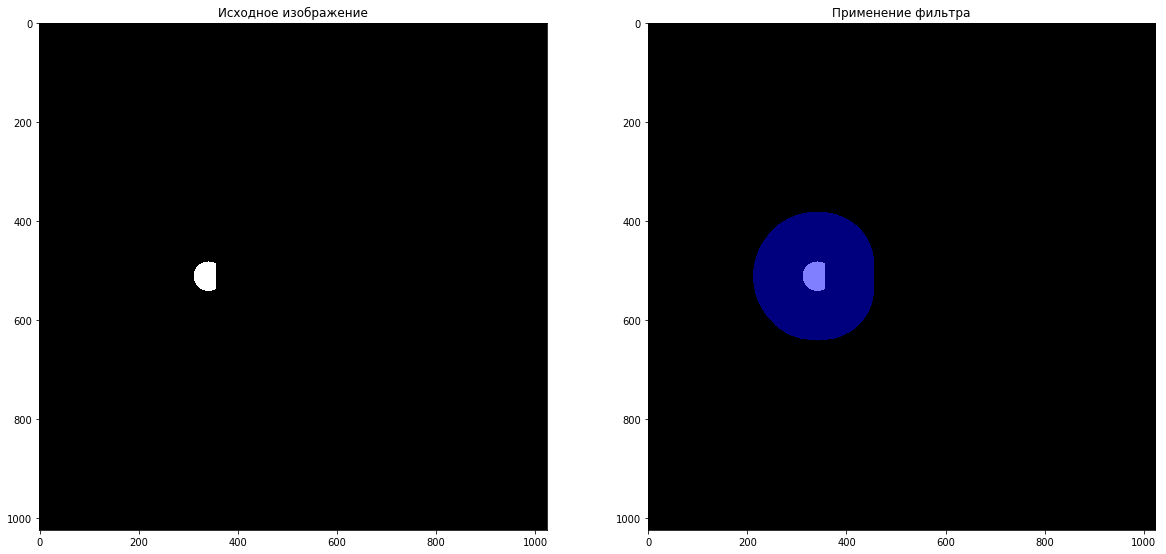

In [20]:
#show_source(img)
res = apply_and_show(img, kernel, 'erosion_example_3.png')

In [21]:
save_image('erosion_res_3.png', res)

0 255 (1024, 1024, 3)
